In [49]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.sans-serif"] = ["SimHei"]    ##中文字体
plt.rcParams["axes.unicode_minus"] = False      ##负号正常显示
sns.set(font = "SimHei")

In [50]:
## 设定工作路径
path = r"D:\myresearch\heartfailure"
os.chdir(path)

In [51]:
data_original = pd.read_excel('heart.xlsx',index_col=0,header=2)     ##读取文件，第一列为索引，第三行为列名

In [52]:
data_original.shape

(21144, 30)

In [53]:
data_original.dropna(how = "all",inplace = True)      ##删除全空行

In [54]:
data_original.dropna(how = "all",axis = 1,inplace = True)   ##删除全空列

In [55]:
data_original.shape

(21143, 22)

In [56]:
data = data_original.replace(regex = {">|<":""})     #删除所有大于号和小于号

In [57]:
def sub_list(ls,content):
    l = []
    '''
    再列表中查找包含指定字符串的元素，并返回新列表
    ls:由字符串构成的列表或array   
    content:指定的字符串列表   
    '''
    for word in ls:
        for con in content:
            if con in word:
                l.append(word)
    return l 

In [58]:
def MinMax(data,list):
    '''获取dataset中list列的最大自小值
        并打印出来
    '''    
    for word in list:
        no_nan = data[data[word].notnull()]
        bottom = no_nan[word].max()
        top = no_nan[word].min()
        print(word+"最大："+str(bottom)+",最小"+str(top))
    

In [59]:
data_original.columns

Index(['流水号', '性别', '出生日期', '年龄', '入院日期', '出院日期', '实际住院天数', '离院方式', '出院情况',
       '_BNP', '心钠素（脑钠肽）', '超敏肌钙蛋白T', 'HSST0TNT', 'PRO-BNP', '可溶性生长刺激表达基因2蛋白',
       '肌钙蛋白I', 'TropI', '贝那普利', '尼可地尔', '诺欣妥', '卡托普利', '依姆多'],
      dtype='object')

In [60]:
names = ['_BNP', '心钠素（脑钠肽）','超敏肌钙蛋白T','HSST0TNT', 'PRO-BNP','肌钙蛋白I','TropI']

In [61]:
data[names] = data[names].astype("float")

In [62]:
MinMax(data,names)

_BNP最大：5000.0,最小10.0
心钠素（脑钠肽）最大：5000.0,最小10.0
超敏肌钙蛋白T最大：10.0,最小0.003
HSST0TNT最大：10.0,最小0.003
PRO-BNP最大：35000.0,最小5.0
肌钙蛋白I最大：85.0,最小0.006
TropI最大：103.0,最小0.0


In [63]:
data[data["可溶性生长刺激表达基因2蛋白"].notnull()]["可溶性生长刺激表达基因2蛋白"].unique()   ##查看此列值分布

array(['阳性*', '阴性', '弱阳性*'], dtype=object)

In [64]:
data.to_csv("heart1.csv",encoding="utf-8")   ## 保存文件，可视化后合并同质列

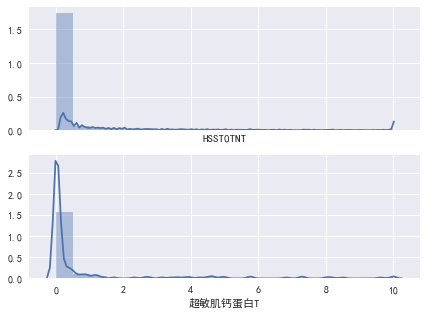

In [23]:
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
sns.distplot(data["HSST0TNT"],bins =20,ax = ax1)
sns.distplot(data["超敏肌钙蛋白T"],bins =20,ax=ax2)

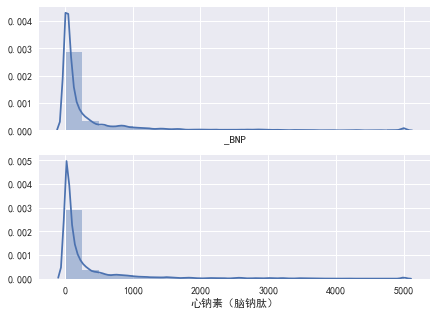

In [24]:
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
sns.distplot(data["_BNP"],bins =20,ax = ax1)
sns.distplot(data["心钠素（脑钠肽）"],bins =20,ax=ax2)

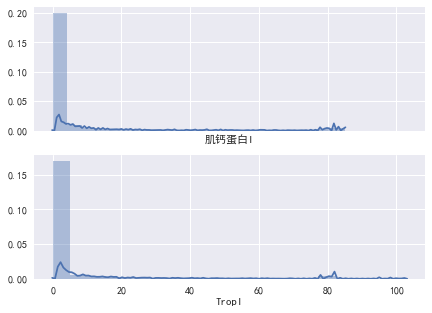

In [25]:
f, (ax1,ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
sns.distplot(data["肌钙蛋白I"],bins =20,ax = ax1)
sns.distplot(data["TropI"],bins =20,ax=ax2)

In [65]:
BNP = sub_list(data.columns,["_BNP","心钠素（脑钠肽）"])
data['bnp'] = data[BNP].max(axis=1)

In [66]:
TNI = sub_list(data.columns,["肌钙蛋白I","TropI"])
data['tni'] = data[TNI].max(axis=1)

In [67]:
HSTNT = sub_list(data.columns,["HSST0TNT","超敏肌钙蛋白T"])
data['hstnt'] = data[HSTNT].max(axis=1)

In [42]:
data.columns

Index(['流水号', '性别', '出生日期', '年龄', '入院日期', '出院日期', '实际住院天数', '离院方式', '出院情况',
       '_BNP', '心钠素（脑钠肽）', '超敏肌钙蛋白T', 'HSST0TNT', 'PRO-BNP', '可溶性生长刺激表达基因2蛋白',
       '肌钙蛋白I', 'TropI', '贝那普利', '尼可地尔', '诺欣妥', '卡托普利', '依姆多', 'bnp', 'hstnt',
       'tni'],
      dtype='object')

In [68]:
data.drop(BNP+TNI+HSTNT,axis=1,inplace=True)

In [69]:
data.to_csv("heart2.csv",encoding="utf-8") 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21143 entries, 1.0 to 21143.0
Data columns (total 19 columns):
流水号               21143 non-null object
性别                21143 non-null object
出生日期              21143 non-null object
年龄                21143 non-null float64
入院日期              21143 non-null object
出院日期              21143 non-null object
实际住院天数            21143 non-null float64
离院方式              20421 non-null object
出院情况              19634 non-null object
PRO-BNP           13645 non-null float64
可溶性生长刺激表达基因2蛋白    190 non-null object
贝那普利              21143 non-null object
尼可地尔              21143 non-null object
诺欣妥               21143 non-null object
卡托普利              21143 non-null object
依姆多               21143 non-null object
bnp               15417 non-null float64
hstnt             8536 non-null float64
tni               16322 non-null float64
dtypes: float64(6), object(13)
memory usage: 3.2+ MB


In [70]:
data.head()

,流水号,性别,出生日期,年龄,入院日期,出院日期,实际住院天数,离院方式,出院情况,PRO-BNP,可溶性生长刺激表达基因2蛋白,贝那普利,尼可地尔,诺欣妥,卡托普利,依姆多,bnp,tni,hstnt
1.0,ZY010000777367,男,1919-01-30,92.0,2011-08-24,2011-09-28,35.0,NaN,好转,NaN,NaN,否,否,否,否,否,NaN,NaN,NaN
2.0,ZY010000778709,男,1928-07-03,83.0,2011-08-29,2011-10-10,42.0,NaN,好转,NaN,NaN,是,否,否,否,是,NaN,NaN,NaN
3.0,ZY010000779138,女,1932-10-08,79.0,2011-08-29,2011-09-20,21.0,NaN,好转,NaN,NaN,是,否,否,否,是,NaN,NaN,NaN
4.0,ZY010000779277,女,1932-03-10,79.0,2011-08-30,2011-09-20,21.0,NaN,好转,NaN,NaN,是,否,否,否,否,NaN,NaN,NaN
5.0,ZY010000781822,男,1924-12-13,86.0,2011-09-06,2011-10-13,37.0,NaN,好转,NaN,NaN,否,否,否,否,是,NaN,NaN,NaN
